In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import KMeans
from  sklearn.datasets import make_blobs

In [ ]:
blob_centers = np.array(
    [
        [0.2, 2.3],
        [-1.5, 2.3],
        [-2.8, 1.8],
        [-2.8, 2.8],
        [-2.8, 1.3]
    ]
)

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples = 2000, centers=blob_centers, cluster_std=blob_std, random_state=123)

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=123)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


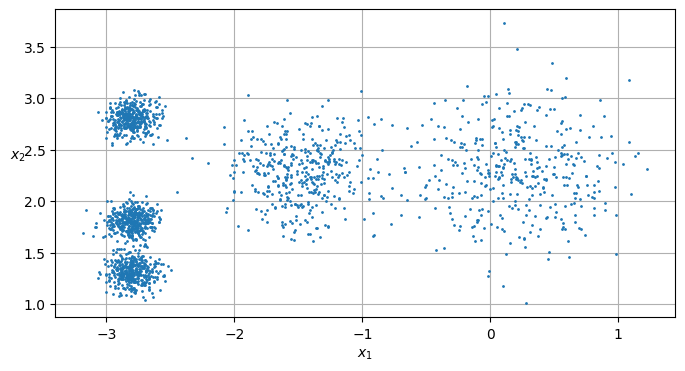

In [ ]:
def plot_clusters(X, y=None):
  plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$", rotation = 0)

plt.figure(figsize=(8,4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

In [ ]:
kmeans.cluster_centers_

array([[-2.80240931,  1.80817477],
       [ 0.22211271,  2.29488501],
       [-1.45400251,  2.28240421],
       [-2.79959856,  1.30967879],
       [-2.7979204 ,  2.80239567]])

In [ ]:
y_pred

array([1, 2, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3,3], [-3, 2.5]])

In [ ]:
kmeans.predict(X_new)

array([1, 1, 4, 4], dtype=int32)

Plotting Decision Boundaries

<ipython-input-15-6c1f26d919eb>:23: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, color='k')


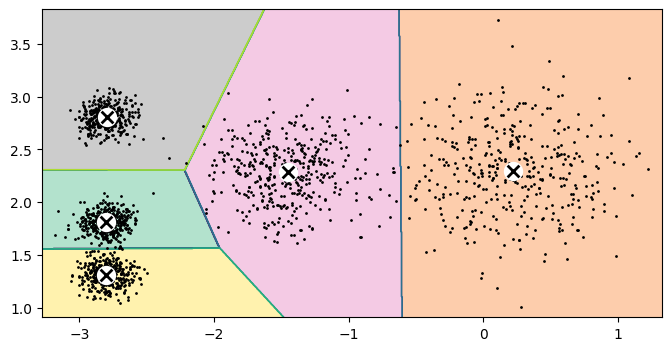

In [ ]:
def plot_data(X):
  plt.plot(X[:, 0], X[:, 1], 'k.', markersize = 2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
  if weights is not None:
    centroids = centroids[weights > weights.max() / 10.0]
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35, linewidths=8, color=circle_color, zorder=11,alpha=1)
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11,alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, 
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1

    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, color='k')

    plot_data(X)

    if (show_centroids):
      plot_centroids(clusterer.cluster_centers_)


plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)

plt.show()

In [ ]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=5)

<ipython-input-15-6c1f26d919eb>:23: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, color='k')
<ipython-input-15-6c1f26d919eb>:23: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, color='k')
<ipython-input-15-6c1f26d919eb>:23: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, color='k')
<ipython-input-15-6c1f26d919eb>:23: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, color='k')
<ipython-input-15-6c1f26d919eb>:23: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, color='k')


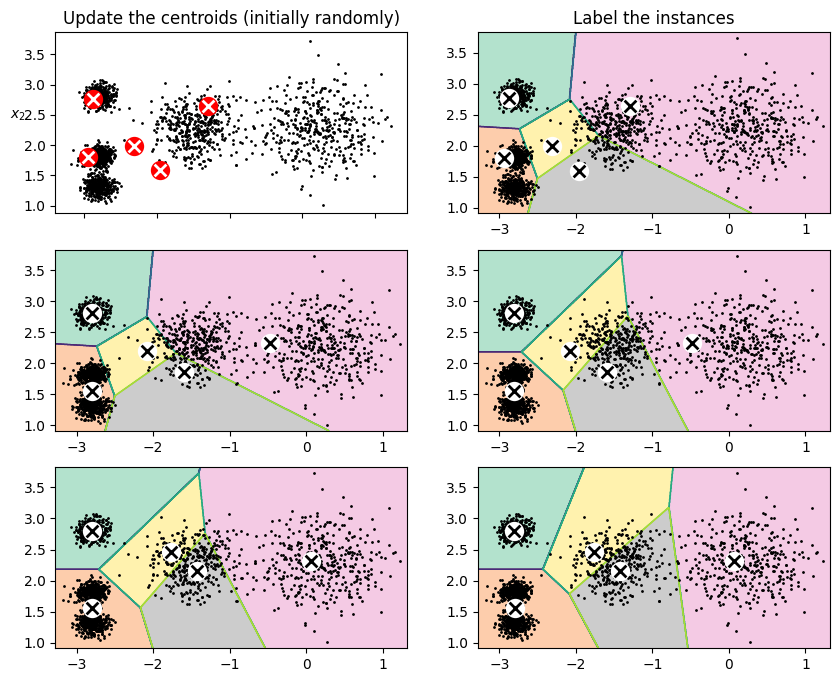

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
  clusterer1.fit(X)
  clusterer2.fit(X)

  plt.figure(figsize=(10, 3.2))

  plt.subplot(121)
  plot_decision_boundaries(clusterer1, X)

  plt.subplot(122)
  plot_decision_boundaries(clusterer2, X, show_ylabels=False)

In [ ]:
kmeans_rnd_1 = KMeans(n_clusters=5, init='random', n_init=1, random_state=123)
kmeans_rnd_2 = KMeans(n_clusters=5, init='random', n_init=1, random_state=321)

<ipython-input-15-6c1f26d919eb>:23: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, color='k')
<ipython-input-15-6c1f26d919eb>:23: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, color='k')


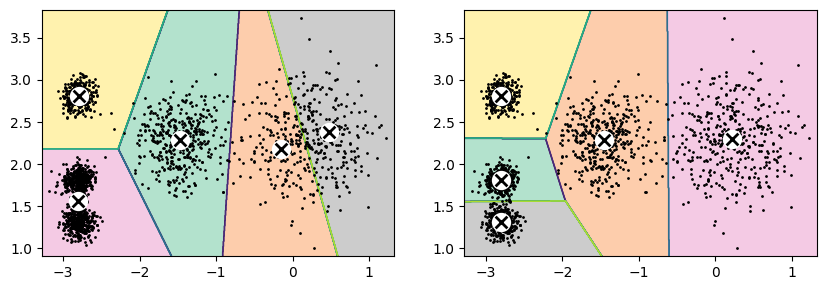

In [ ]:
plot_clusterer_comparison(kmeans_rnd_1, kmeans_rnd_2, X)

In [ ]:
good_init_cetroids = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0,2]])
kmeans_good_init = KMeans(n_clusters=5, init=good_init_cetroids, n_init=1, random_state=321)

In [ ]:
kmeans_good_init.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=321)

<ipython-input-15-6c1f26d919eb>:23: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, color='k')


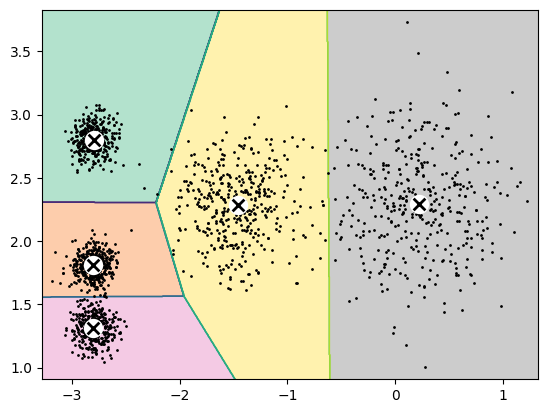

In [ ]:
plot_decision_boundaries(kmeans_good_init, X)

In [ ]:
kmeans_good_init.inertia_

210.31915471169447

In [ ]:
kmeans_rnd_1.inertia_

220.4925484660764

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-15-6c1f26d919eb>:23: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, color='k')
<ipython-input-15-6c1f26d919eb>:23: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, color='k')


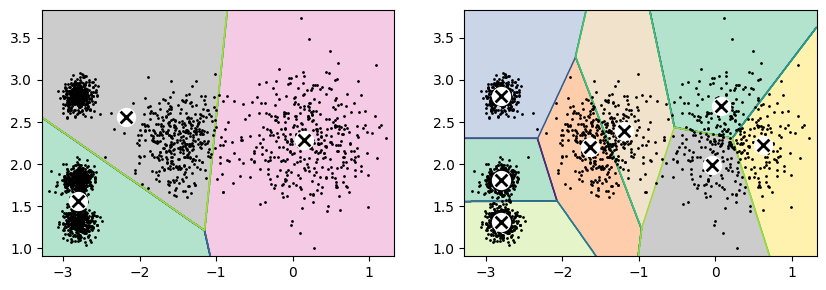

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, random_state=123)
kmeans_k8 = KMeans(n_clusters=8, random_state=123)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X)
plt.show()

In [ ]:
kmeans_k8.inertia_

120.79859629169398

In [ ]:
kmeans_k3.inertia_

657.2636468168259

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

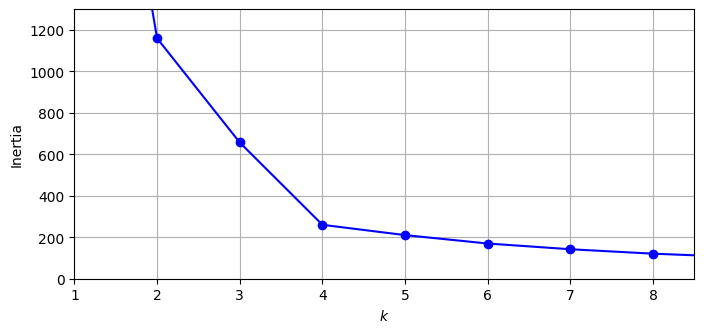

In [ ]:
# plot the indertia as a function of number of clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=123).fit(X)
                  for k in range(1, 10)
               ]

inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1,10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.axis([1, 8.5, 0, 1300])
plt.grid()

plt.show()

In [ ]:
kmeans_per_k

[KMeans(n_clusters=1, random_state=123),
 KMeans(n_clusters=2, random_state=123),
 KMeans(n_clusters=3, random_state=123),
 KMeans(n_clusters=4, random_state=123),
 KMeans(n_clusters=5, random_state=123),
 KMeans(n_clusters=6, random_state=123),
 KMeans(n_clusters=7, random_state=123),
 KMeans(random_state=123),
 KMeans(n_clusters=9, random_state=123)]

<ipython-input-15-6c1f26d919eb>:23: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, color='k')


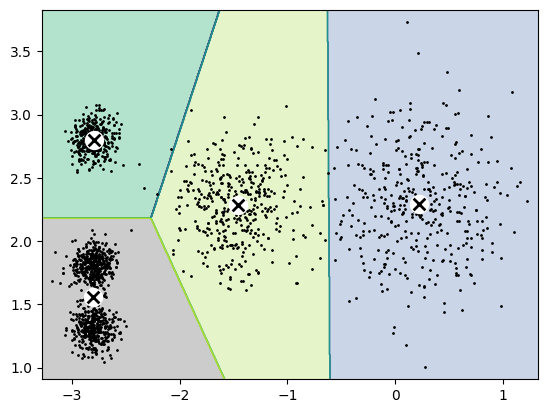

In [ ]:
plot_decision_boundaries(kmeans_per_k[3], X)
plt.show()